# Data cleaning: handling missing data

This notebook is an abstraction of the Kaggle's 5-Day Challenge.

The **goal** of this exercise is to clean missing entries. 

The **evaluation** of the assignment will follow:

* Design process and thinking as a data engineer.
* Validation of knowledge on the different tools and steps throughout the process.
* Storytelling and visualisation of the insights.

Exercise **workflow**:

* Import dependencies & download dataset from [here](https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/download).
* Explore missing data points and values.
* Assess the reason for the missing data points and values.
* Evaluate a method to drop the missing values.
* Evaluate a method to fill the missing values.
    
Notes:

* Write your code into the `TODO` cells.
* Feel free to choose how to present the results throughout the exercise, what libraries (e.g., seaborn, bokeh, etc.) and/or tools (e.g., PowerBI or Tableau).

## Preamble
________

In [7]:
### just to inspect what we are about to install 
### most packages where installed automatically by missingno
#!cat ../requirements.txt 
!pip install -r ../requirements.txt 

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import pandas as pd
import numpy as np

np.random.seed(0) 

import missingno as msno
import matplotlib.pyplot as plt

# This is just to make the presentation cleaner, but warnings need to be analyzed and fixed.
# But I dint have time for it. 
import warnings
warnings.filterwarnings('ignore')

%run functions.ipynb

# ------------------ PART 1: Ingestion and exploratory analysis -----------------

## Data
________

**TODO**

* Download the data from [here](https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016/download)
* Get some info regarding the dataframe (e.g., shape, dimensions, column names, etc.)

In [9]:
### REPLACE WITH YOUR PATH
BASE_PATH = '/home/matias/data/kaggle/NFL Play by Play 2009-2016/archive'
df = build_df_from_csv('NFL Play by Play 2009-2018 (v5).csv', BASE_PATH, clean_headers = False)

Reading: NFL Play by Play 2009-2018 (v5).csv
shape: (449371, 255)
columns: ['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_score_post', 'score_different

<AxesSubplot:>

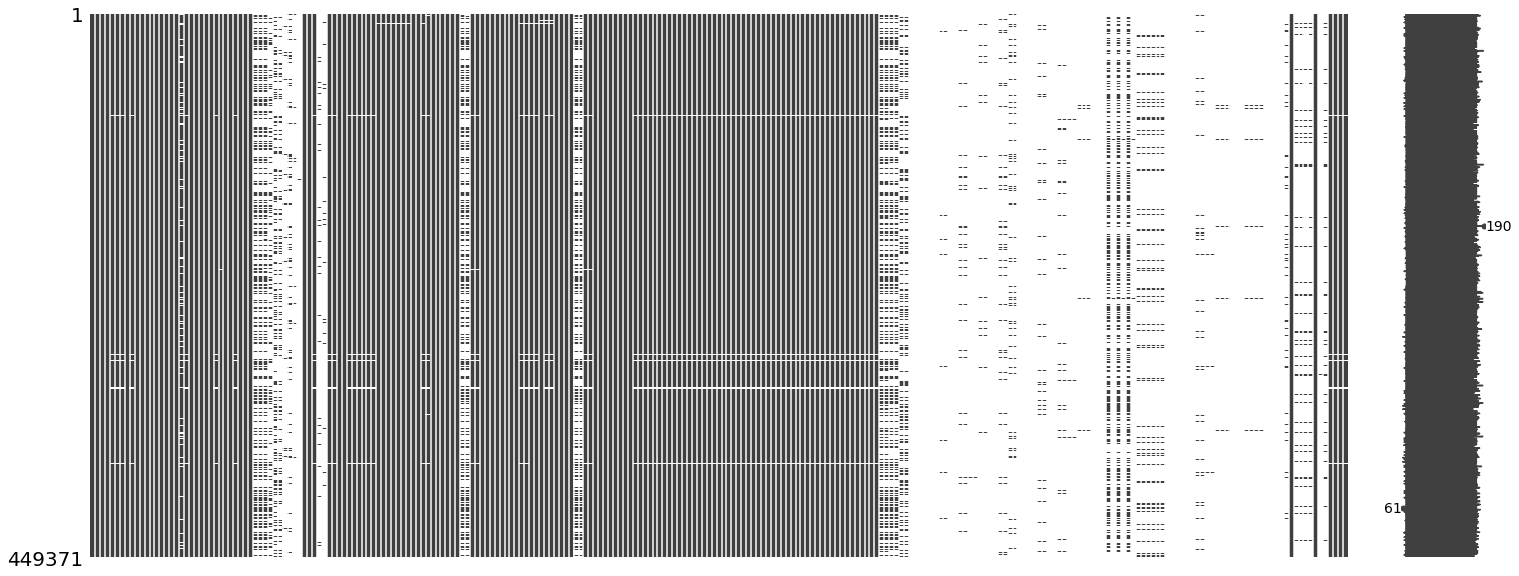

In [10]:
msno.matrix(df)

## Exploration of missing data points and values
___

**TODO**

* How many missing values are there?
* What's the percentage of missing values?


In [11]:
print_stats_about_missing_values(df, mode='all')

total_number_of_null_values: 44,121,484
total_number_of_filled_values: 70,468,121
total_number_of_values: 114,589,605
pc_number_of_null_values: 0.385039


**TODO**
* How many missing data points per column are there?

In [12]:
df.isnull().sum() 

play_id                               0
game_id                               0
home_team                             0
away_team                             0
posteam                           13242
                                  ...  
penalty_type                     418232
defensive_two_point_attempt       12874
defensive_two_point_conv          12874
defensive_extra_point_attempt     12874
defensive_extra_point_conv        12874
Length: 255, dtype: int64

## Assessment of missing data points and values
____
 
**TODO**

* Look at the # of missing points in all nonzero columns sorted descending. 

In [13]:
print_number_of_missing_points_in_descending_order(df)

assist_tackle_4_team           100.0
assist_tackle_4_player_id      100.0
lateral_sack_player_id         100.0
lateral_sack_player_name       100.0
assist_tackle_4_player_name    100.0
                               ...  
total_away_epa                   0.0
total_home_epa                   0.0
two_point_conversion_prob        0.0
extra_point_prob                 0.0
play_id                          0.0
Length: 255, dtype: float64

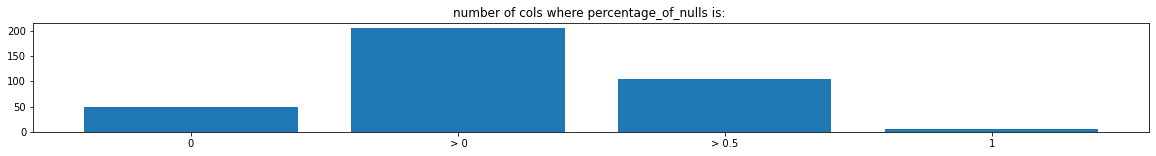

In [14]:
# ca 50 cols are totally solid 
# Few are totally empty 

plot_pc_of_nulls(df)

## Drop missing values
___

**TODO**

* Evaluate removing all rows with missing values


In [15]:
# Dropping all rows with at least one null is not a good idea. 
# The df reduces to zero rows, as shown below.
df.dropna(axis=0)  

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv


**TODO**
* Evaluate removing all columns with at least one missing value


In [16]:
# This makes more sense, since, after dropping, we have a solid df with 100% solid cols.
# As we saw in the comparison above. 
remove_all_cols_with_at_least_one_missing_value(df).shape

(449371, 50)

**TODO**
* Compare the original dataframe and the filtered ones.

In [17]:
# df5:
# The original df contains many cols with NaN values. In particular, 5 cols contain only null values. 
# and thus should be discarded immediately, or filled somewhow. The method for filling depends on the nature of the column.
# For continous variables, where the records follow an order (for example timestamps, which can be sorted asc/desc) these can be
# filled with the avg(previous, next value)
# Both continous and categorical variables can be filled for example with some ML algorithm, by training on those rows that have the labels,
# and predicting on those rows where the label is NaN. 


## Fill in missing values
_____

**TODO**

* Select a subset of the dataset



In [18]:
# I pick df and make it leaner by dropping the unnecessary cols.  
df = remove_cols_with_only_null_values(df)

The following cols contain only nulls and will be removed: ['lateral_sack_player_id', 'lateral_sack_player_name', 'assist_tackle_4_player_id', 'assist_tackle_4_player_name', 'assist_tackle_4_team']


**TODO**
* Evaluate replacing all NaNs with 0

In [19]:
# Doesnt make much sense since many of the cols are of type "object", and contain strings.   
# E.g. penalty_player_name, penalty_type, etc
# A better idea would be replacing NaN with a string, like "empty" or "no_data" or similar.  
df.fillna(0)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,4059,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
449367,4081,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
449368,4106,2018121700,CAR,NO,CAR,home,NO,CAR,61.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
449369,4128,2018121700,CAR,NO,NO,away,CAR,CAR,39.0,2018-12-17,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0


**TODO**

* Evaluate replacing all NaNs with the value of the next value in the same column


In [20]:
# This make sense for continous variables, and if the records are ordered. Not categorical variables or things like player name. 
# Example: filling a missing penalty_player_name with "E.Monroe" makes no sense at all, and will severely decrease the quality of the data,
# as this player will now have wrong data points associated with him.  
df.fillna(method='ffill').head(3)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


**TODO**
* Compare the original dataframe and the one with the filled NaNs

In [21]:
pd.set_option('display.max_columns', 250)
df.head(3)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,pass_defense_1_player_id,pass_defense_1_player_name,pass_defense_2_player_id,pass_defense_2_player_name,fumbled_1_

In [22]:
# as discussed, nulls should be replaced carefully, and only if it makes sense.
# In this dataset in particular, there are plenty of nulls, and for most cases it's probably better to work with leaner dfs. 
# See cmd 7, msno.matrix(df5) 

## Some data that should probably be discarded :
# 1. Rows with majority of nulls (e.g row 449370), unless the use case requieres the cols that are actually filled (E.g play_id, game_id, home_team, yardline_100)
# 2. A large portion of cols that contain a high number of nulls (all those towards the right side of the graph)


# Final comments:
# This dataset seems to include data from different entities, thus introducing lot of redundancy (which is good for fast analytical queries, 
# but mixes too many different things in one table). 
# For example, this table could be broken down in, say, three tables; PLAYERS, PLAYS, GAMES. 
# where the respective primary keys are player_id, play_id and game_id


# This would help keeping things more organised and lower redundancy on data, but joining them back to build the fact table can be slow. 